<h1 style="text-align: center">
<span style="">Data Cleaning</span>
</h1>
<hr style="color: #DD3403;">

| File Name | Summary | DataFrame Name |
|------|------|------|
| DECENNIALCD1182020.P1-2024-03-19T164121.csv |  Total Population  | pop |
| ACSST1Y2022.S1901-2024-03-19T170309.csv |  Income in the past 12 months (in 2022 inflation-adjusted dollars)  | inc |
| ACSST1Y2022.S1501-2024-03-19T175616.csv |  Education Attainment  | edu |
| ACSST1Y2022.S1101-2024-03-19T182649.csv | Households and Families | fam
| ACSDT1Y2022.B18135-2024-03-19T184108.csv | Age by Disability Status by Health Insurance Coverage Status | dis |


In [1]:
import pandas as pd

In [2]:
def cleansort(df):
    #修改第一列列名为'State'
    df.columns.values[0] = 'State'
    #删除误差行，只考虑平均值，简化数据结构
    df = df[~df['State'].str.contains('Margin of Error')].reset_index().drop(['index'],axis=1)
    # 除了第一列之外的所有列向上移动一个单位
    df_shift = df.iloc[:, 1:].shift(-1)
    # 将State列重新添加回Dataframe
    df_shift['State'] = df['State']
    # 将State列调回第一列
    cols = df_shift.columns.tolist()  # 获取列名列表
    new_cols_order = [cols[-1]] + cols[:-1]  # 创建新的列顺序
    df = df_shift[new_cols_order] #应用新的列顺序
    #简化结构
    df = df[~df['State'].str.contains('Estimate')].reset_index().drop(['index'],axis=1)
    return df

In [3]:
pop = pd.read_csv('DECENNIALCD1182020.P1-2024-03-19T164121.csv')
pop = pop.dropna(subset=['Total']).reset_index().drop(['index'],axis=1)
pop.columns = ['State','Population']
pop['State'] = pop['State'].str.strip()
pop_final = pop
pop_final.head()

,State,Population
0,Alabama,"5,024,279"
1,Alaska,"733,391"
2,Arizona,"7,151,502"
3,Arkansas,"3,011,524"
4,California,"39,538,223"


In [4]:
inc = pd.read_csv('ACSST1Y2022.S1901-2024-03-19T170309.csv')
inc = cleansort(inc)

# 输出inc1.xlsx，便于Excel中处理
inc.to_excel('inc1.xlsx', index=False)

# Excel中实现矩阵的平铺，处理后文件为inc2.xlsx
inc2 = pd.read_excel('inc2.xlsx')

# 删除无关行
inc3 = pd.read_excel('inc3.xlsx')
inc3 = inc3[~inc3['State'].str.contains('Families')].reset_index().drop(['index'],axis=1)
inc3 = inc3[~inc3['State'].str.contains('Married-couple')].reset_index().drop(['index'],axis=1)
inc3 = inc3[~inc3['State'].str.contains('Nonfamily')].reset_index().drop(['index'],axis=1)

# 除了第一列之外的所有列向上移动一个单位
inc3_shift = inc3.iloc[:, 1:].shift(-1)
# 将State列重新添加回Dataframe
inc3_shift['State'] = inc3['State']
# 将State列调回第一列
cols = inc3_shift.columns.tolist()  # 获取列名列表
new_cols_order = [cols[-1]] + cols[:-1]  # 创建新的列顺序
inc3 = inc3_shift[new_cols_order] #应用新的列顺序
inc3 = inc3[~inc3['State'].str.contains('Households')].reset_index().drop(['index'],axis=1)

# 输出最终文件inc4.xlsx
inc3.to_excel('inc_final.xlsx', index=False)

inc_final = inc3
inc_final.head()

,State,Households Total,Households Median income (dollars),Households Mean income (dollars),Families Total,Families Median income (dollars),Families Mean income (dollars),Married-couple families Total,Married-couple families Median income (dollars),Married-couple families Mean income (dollars),Nonfamily households Total,Nonfamily households Median income (dollars),Nonfamily households Mean income (dollars)
0,Alabama,"2,016,448","59,674","82,956","1,308,988","77,668","100,785","941,596","94,370","118,799","707,460","32,330","47,145"
1,Alaska,"274,574","88,121","109,524","175,789","105,329","124,663","129,511","115,920","141,287","98,785","57,657","74,242"
2,Arizona,"2,850,377","74,568","101,316","1,843,530","88,679","116,717","1,332,270","103,182","133,297","1,006,847","47,840","66,724"
3,Arkansas,"1,216,207","55,432","76,853","777,933","70,708","92,935","572,596","84,273","106,939","438,274","31,230","45,384"
4,California,"13,550,586","91,551","131,504","9,150,804","104,823","147,628","6,516,115","126,577","172,535","4,399,782","59,348","89,374"


In [5]:
edu = pd.read_csv('ACSST1Y2022.S1501-2024-03-19T175616.csv')
edu = cleansort(edu)

# 删除无关数据
edu = edu[~edu['State'].str.contains('Male')].reset_index().drop(['index'],axis=1)
edu = edu[~edu['State'].str.contains('Female')].reset_index().drop(['index'],axis=1)

# 导出edu1.xlsx，便于Excel处理
edu.to_excel('edu1.xlsx', index=False)

# Excel中实现矩阵的平铺，处理后文件为inc2.xlsx
edu2 = pd.read_excel('edu2.xlsx')
edu2 = edu2[~edu2['State'].str.contains('Percent')].reset_index().drop(['index'],axis=1)

# 除了第一列之外的所有列向上移动一个单位
edu2_shift = edu2.iloc[:, 1:].shift(-1)
# 将State列重新添加回Dataframe
edu2_shift['State'] = edu2['State']
# 将State列调回第一列
cols = edu2_shift.columns.tolist()  # 获取列名列表
new_cols_order = [cols[-1]] + cols[:-1]  # 创建新的列顺序
edu2 = edu2_shift[new_cols_order] #应用新的列顺序
edu2 = edu2[~edu2['State'].str.contains('Total')].reset_index().drop(['index'],axis=1)
edu2 = edu2.drop(['Percentage: Population 25 years and over'], axis=1)
edu2.to_excel('edu_final.xlsx', index=False)

edu_final = edu2
edu_final.head()

,State,Population 18 to 24 years,Population 18 to 24 years!!Less than high school graduate,Population 18 to 24 years!!High school graduate (includes equivalency),Population 18 to 24 years!!Some college or associate's degree,Population 18 to 24 years!!Bachelor's degree or higher,Population 25 years and over,Population 25 years and over!!Less than 9th grade,"Population 25 years and over!!9th to 12th grade, no diploma",Population 25 years and over!!High school graduate (includes equivalency),...,Percentage: Population 18 to 24 years!!Bachelor's degree or higher,Percentage: Population 25 years and over!!Less than 9th grade,"Percentage: Population 25 years and over!!9th to 12th grade, no diploma",Percentage: Population 25 years and over!!High school graduate (includes equivalency),"Percentage: Population 25 years and over!!Some college, no degree",Percentage: Population 25 years and over!!Associate's degree,Percentage: Population 25 years and over!!Bachelor's degree,Percentage: Population 25 years and over!!Graduate or professional degree,Percentage: Population 25 years and over!!High school graduate or higher,Percentage: Population 25 years and over!!Bachelor's degree or higher
0,Alabama,"488,344","58,089","176,620","208,994","44,641","3,474,924","118,034","271,263","1,057,155",...,9.1%,3.4%,7.8%,30.4%,20.6%,9.0%,17.5%,11.3%,88.8%,28.8%
1,Alaska,"68,620","7,801","33,068","22,097","5,654","489,218","10,950","21,719","142,455",...,8.2%,2.2%,4.4%,29.1%,23.7%,9.9%,19.2%,11.3%,93.3%,30.6%
2,Arizona,"717,938","102,059","256,195","281,101","78,583","5,053,656","241,467","306,781","1,202,946",...,10.9%,4.8%,6.1%,23.8%,23.0%,9.4%,20.4%,12.5%,89.2%,33.0%
3,Arkansas,"292,181","37,246","109,301","117,675","27,959","2,057,624","82,740","140,697","705,670",...,9.6%,4.0%,6.8%,34.3%,21.3%,8.1%,15.7%,9.7%,89.1%,25.4%
4,California,"3,663,563","339,703","1,308,667","1,553,990","461,203","26,866,773","2,376,805","1,738,878","5,506,855",...,12.6%,8.8%,6.5%,20.5%,19.3%,7.9%,22.5%,14.4%,84.7%,37.0%


In [6]:
fam = pd.read_csv('ACSST1Y2022.S1101-2024-03-19T182649.csv')
fam = cleansort(fam)
fam = fam[~fam['State'].str.contains('Married-couple')].reset_index().drop(['index'],axis=1)
fam = fam[~fam['State'].str.contains('no spouse')].reset_index().drop(['index'],axis=1)
fam = fam[~fam['State'].str.contains('Married_couple')].reset_index().drop(['index'],axis=1)
fam = fam[~fam['State'].str.contains('Nonfamily')].reset_index().drop(['index'],axis=1)
fam.to_excel('fam1.xlsx',index=False)
# 除了第一列之外的所有列向上移动一个单位
fam_shift = fam.iloc[:, 1:].shift(-1)
# 将State列重新添加回Dataframe
fam_shift['State'] = fam['State']
# 将State列调回第一列
cols = fam_shift.columns.tolist()  # 获取列名列表
new_cols_order = [cols[-1]] + cols[:-1]  # 创建新的列顺序
fam = fam_shift[new_cols_order] #应用新的列顺序
fam = fam[~fam['State'].str.contains('Total')].reset_index().drop(['index'],axis=1)

#删除NA列
fam = fam.drop(columns=['Total households!!UNITS IN STRUCTURE','HOUSEHOLDS','FAMILIES','AGE OF OWN CHILDREN','Total households!!SELECTED HOUSEHOLDS BY TYPE','Total households!!HOUSING TENURE'])

fam_final = fam
fam_final.to_excel('fam_final.xlsx',index=False)
fam_final.head()

,State,HOUSEHOLDS!!Total households,HOUSEHOLDS!!Average household size,FAMILIES!!Total families,FAMILIES!!Average family size,AGE OF OWN CHILDREN!!Households with own children of the householder under 18 years,AGE OF OWN CHILDREN!!Households with own children of the householder under 18 years!!Under 6 years only,AGE OF OWN CHILDREN!!Households with own children of the householder under 18 years!!Under 6 years and 6 to 17 years,AGE OF OWN CHILDREN!!Households with own children of the householder under 18 years!!6 to 17 years only,Total households,Total households!!SELECTED HOUSEHOLDS BY TYPE!!Households with one or more people under 18 years,Total households!!SELECTED HOUSEHOLDS BY TYPE!!Households with one or more people 60 years and over,Total households!!SELECTED HOUSEHOLDS BY TYPE!!Households with one or more people 65 years and over,Total households!!SELECTED HOUSEHOLDS BY TYPE!!Householder living alone,Total households!!SELECTED HOUSEHOLDS BY TYPE!!Householder living alone!!65 years and over,Total households!!UNITS IN STRUCTURE!!1-unit structures,Total households!!UNITS IN STRUCTURE!!2-or-more-unit structures,Total households!!UNITS IN STRUCTURE!!Mobile homes and all other types of units,Total households!!HOUSING TENURE!!Owner-occupied housing units,Total households!!HOUSING TENURE!!Renter-occupied housing units
0,Alabama,"2,016,448",2.45,"1,308,988",3.06,"505,646",20.9%,20.2%,58.9%,"2,016,448",28.8%,42.6%,32.3%,30.4%,12.2%,73.3%,15.0%,11.7%,70.2%,29.8%
1,Alaska,"274,574",2.56,"175,789",3.16,"76,129",22.4%,19.8%,57.8%,"274,574",30.8%,36.0%,26.5%,27.8%,8.7%,70.5%,26.0%,3.5%,66.1%,33.9%
2,Arizona,"2,850,377",2.53,"1,843,530",3.10,"717,526",19.4%,20.9%,59.7%,"2,850,377",28.4%,43.7%,34.2%,27.2%,11.7%,71.4%,20.4%,8.2%,67.4%,32.6%
3,Arkansas,"1,216,207",2.44,"777,933",3.06,"315,961",20.7%,21.7%,57.7%,"1,216,207",29.7%,41.6%,31.5%,30.8%,12.2%,72.0%,17.4%,10.6%,66.5%,33.5%
4,California,"13,550,586",2.82,"9,150,804",3.39,"3,774,330",19.4%,19.7%,60.9%,"13,550,586",31.9%,41.9%,32.0%,24.3%,9.9%,65.2%,31.3%,3.5%,55.8%,44.2%


In [7]:
dis = pd.read_csv('ACSDT1Y2022.B18135-2024-03-19T184108.csv')
dis = cleansort(dis)
dis_final = dis
dis_final.to_excel('dis_final.xlsx',index=False)
dis_final.head()

,State,Total:,Total:!!Under 19 years:,Total:!!Under 19 years:!!With a disability:,Total:!!Under 19 years:!!With a disability:!!With health insurance coverage:,Total:!!Under 19 years:!!With a disability:!!With health insurance coverage:!!With private health insurance coverage,Total:!!Under 19 years:!!With a disability:!!With health insurance coverage:!!With public health coverage,Total:!!Under 19 years:!!With a disability:!!No health insurance coverage,Total:!!Under 19 years:!!No disability:,Total:!!Under 19 years:!!No disability:!!With health insurance coverage:,...,Total:!!65 years and over:!!With a disability:,Total:!!65 years and over:!!With a disability:!!With health insurance coverage:,Total:!!65 years and over:!!With a disability:!!With health insurance coverage:!!With private health insurance coverage,Total:!!65 years and over:!!With a disability:!!With health insurance coverage:!!With public health coverage,Total:!!65 years and over:!!With a disability:!!No health insurance coverage,Total:!!65 years and over:!!No disability:,Total:!!65 years and over:!!No disability:!!With health insurance coverage:,Total:!!65 years and over:!!No disability:!!With health insurance coverage:!!With private health insurance coverage,Total:!!65 years and over:!!No disability:!!With health insurance coverage:!!With public health coverage,Total:!!65 years and over:!!No disability:!!No health insurance coverage
0,Alabama,"4,988,625","1,182,663","64,846","63,382","27,185","40,777","1,464","1,117,817","1,082,053",...,"341,742","341,036","184,936","336,644",706,"548,156","545,335","332,367","527,907","2,821"
1,Alaska,"701,511","183,084","8,092","7,685","4,502","4,373",407,"174,992","160,008",...,"33,928","33,722","18,853","33,218",206,"66,057","64,883","44,794","60,813","1,174"
2,Arizona,"7,251,924","1,683,061","86,850","81,295","42,474","48,893","5,555","1,596,211","1,460,012",...,"434,713","431,582","215,359","425,340","3,131","927,485","918,455","481,293","880,678","9,030"
3,Arkansas,"2,991,199","739,713","49,246","46,904","16,358","35,693","2,342","690,467","648,975",...,"209,557","209,133","103,125","207,617",424,"313,575","311,578","175,266","302,398","1,997"
4,California,"38,548,670","9,016,549","373,663","363,444","175,389","226,480","10,219","8,642,886","8,365,704",...,"2,024,775","2,005,543","856,988","1,961,760","19,232","4,030,046","3,981,504","2,035,778","3,724,912","48,542"


In [8]:
#Combine 5 dataframes
from functools import reduce
final = [pop_final,inc_final,edu_final,fam_final,dis_final]
dem_final = reduce(lambda left, right: pd.merge(left, right, on='State', how='inner'), final)
dem_final.to_excel('Demographic.xlsx',index=False)
dem_final.head()

,State,Population,Households Total,Households Median income (dollars),Households Mean income (dollars),Families Total,Families Median income (dollars),Families Mean income (dollars),Married-couple families Total,Married-couple families Median income (dollars),...,Total:!!65 years and over:!!With a disability:,Total:!!65 years and over:!!With a disability:!!With health insurance coverage:,Total:!!65 years and over:!!With a disability:!!With health insurance coverage:!!With private health insurance coverage,Total:!!65 years and over:!!With a disability:!!With health insurance coverage:!!With public health coverage,Total:!!65 years and over:!!With a disability:!!No health insurance coverage,Total:!!65 years and over:!!No disability:,Total:!!65 years and over:!!No disability:!!With health insurance coverage:,Total:!!65 years and over:!!No disability:!!With health insurance coverage:!!With private health insurance coverage,Total:!!65 years and over:!!No disability:!!With health insurance coverage:!!With public health coverage,Total:!!65 years and over:!!No disability:!!No health insurance coverage
0,Alabama,"5,024,279","2,016,448","59,674","82,956","1,308,988","77,668","100,785","941,596","94,370",...,"341,742","341,036","184,936","336,644",706,"548,156","545,335","332,367","527,907","2,821"
1,Alaska,"733,391","274,574","88,121","109,524","175,789","105,329","124,663","129,511","115,920",...,"33,928","33,722","18,853","33,218",206,"66,057","64,883","44,794","60,813","1,174"
2,Arizona,"7,151,502","2,850,377","74,568","101,316","1,843,530","88,679","116,717","1,332,270","103,182",...,"434,713","431,582","215,359","425,340","3,131","927,485","918,455","481,293","880,678","9,030"
3,Arkansas,"3,011,524","1,216,207","55,432","76,853","777,933","70,708","92,935","572,596","84,273",...,"209,557","209,133","103,125","207,617",424,"313,575","311,578","175,266","302,398","1,997"
4,California,"39,538,223","13,550,586","91,551","131,504","9,150,804","104,823","147,628","6,516,115","126,577",...,"2,024,775","2,005,543","856,988","1,961,760","19,232","4,030,046","3,981,504","2,035,778","3,724,912","48,542"


In [9]:
for i in range(1, len(dem_final.columns)):
    dem_final.iloc[:, i] = dem_final.iloc[:, i].astype(str).str.replace('%', '').str.replace(',', '').astype(float)

dem_final.to_excel('Demographic2.xlsx',index=False)
dem_final.head()

,State,Population,Households Total,Households Median income (dollars),Households Mean income (dollars),Families Total,Families Median income (dollars),Families Mean income (dollars),Married-couple families Total,Married-couple families Median income (dollars),...,Total:!!65 years and over:!!With a disability:,Total:!!65 years and over:!!With a disability:!!With health insurance coverage:,Total:!!65 years and over:!!With a disability:!!With health insurance coverage:!!With private health insurance coverage,Total:!!65 years and over:!!With a disability:!!With health insurance coverage:!!With public health coverage,Total:!!65 years and over:!!With a disability:!!No health insurance coverage,Total:!!65 years and over:!!No disability:,Total:!!65 years and over:!!No disability:!!With health insurance coverage:,Total:!!65 years and over:!!No disability:!!With health insurance coverage:!!With private health insurance coverage,Total:!!65 years and over:!!No disability:!!With health insurance coverage:!!With public health coverage,Total:!!65 years and over:!!No disability:!!No health insurance coverage
0,Alabama,5024279.0,2016448.0,59674.0,82956.0,1308988.0,77668.0,100785.0,941596.0,94370.0,...,341742.0,341036.0,184936.0,336644.0,706.0,548156.0,545335.0,332367.0,527907.0,2821.0
1,Alaska,733391.0,274574.0,88121.0,109524.0,175789.0,105329.0,124663.0,129511.0,115920.0,...,33928.0,33722.0,18853.0,33218.0,206.0,66057.0,64883.0,44794.0,60813.0,1174.0
2,Arizona,7151502.0,2850377.0,74568.0,101316.0,1843530.0,88679.0,116717.0,1332270.0,103182.0,...,434713.0,431582.0,215359.0,425340.0,3131.0,927485.0,918455.0,481293.0,880678.0,9030.0
3,Arkansas,3011524.0,1216207.0,55432.0,76853.0,777933.0,70708.0,92935.0,572596.0,84273.0,...,209557.0,209133.0,103125.0,207617.0,424.0,313575.0,311578.0,175266.0,302398.0,1997.0
4,California,39538223.0,13550586.0,91551.0,131504.0,9150804.0,104823.0,147628.0,6516115.0,126577.0,...,2024775.0,2005543.0,856988.0,1961760.0,19232.0,4030046.0,3981504.0,2035778.0,3724912.0,48542.0


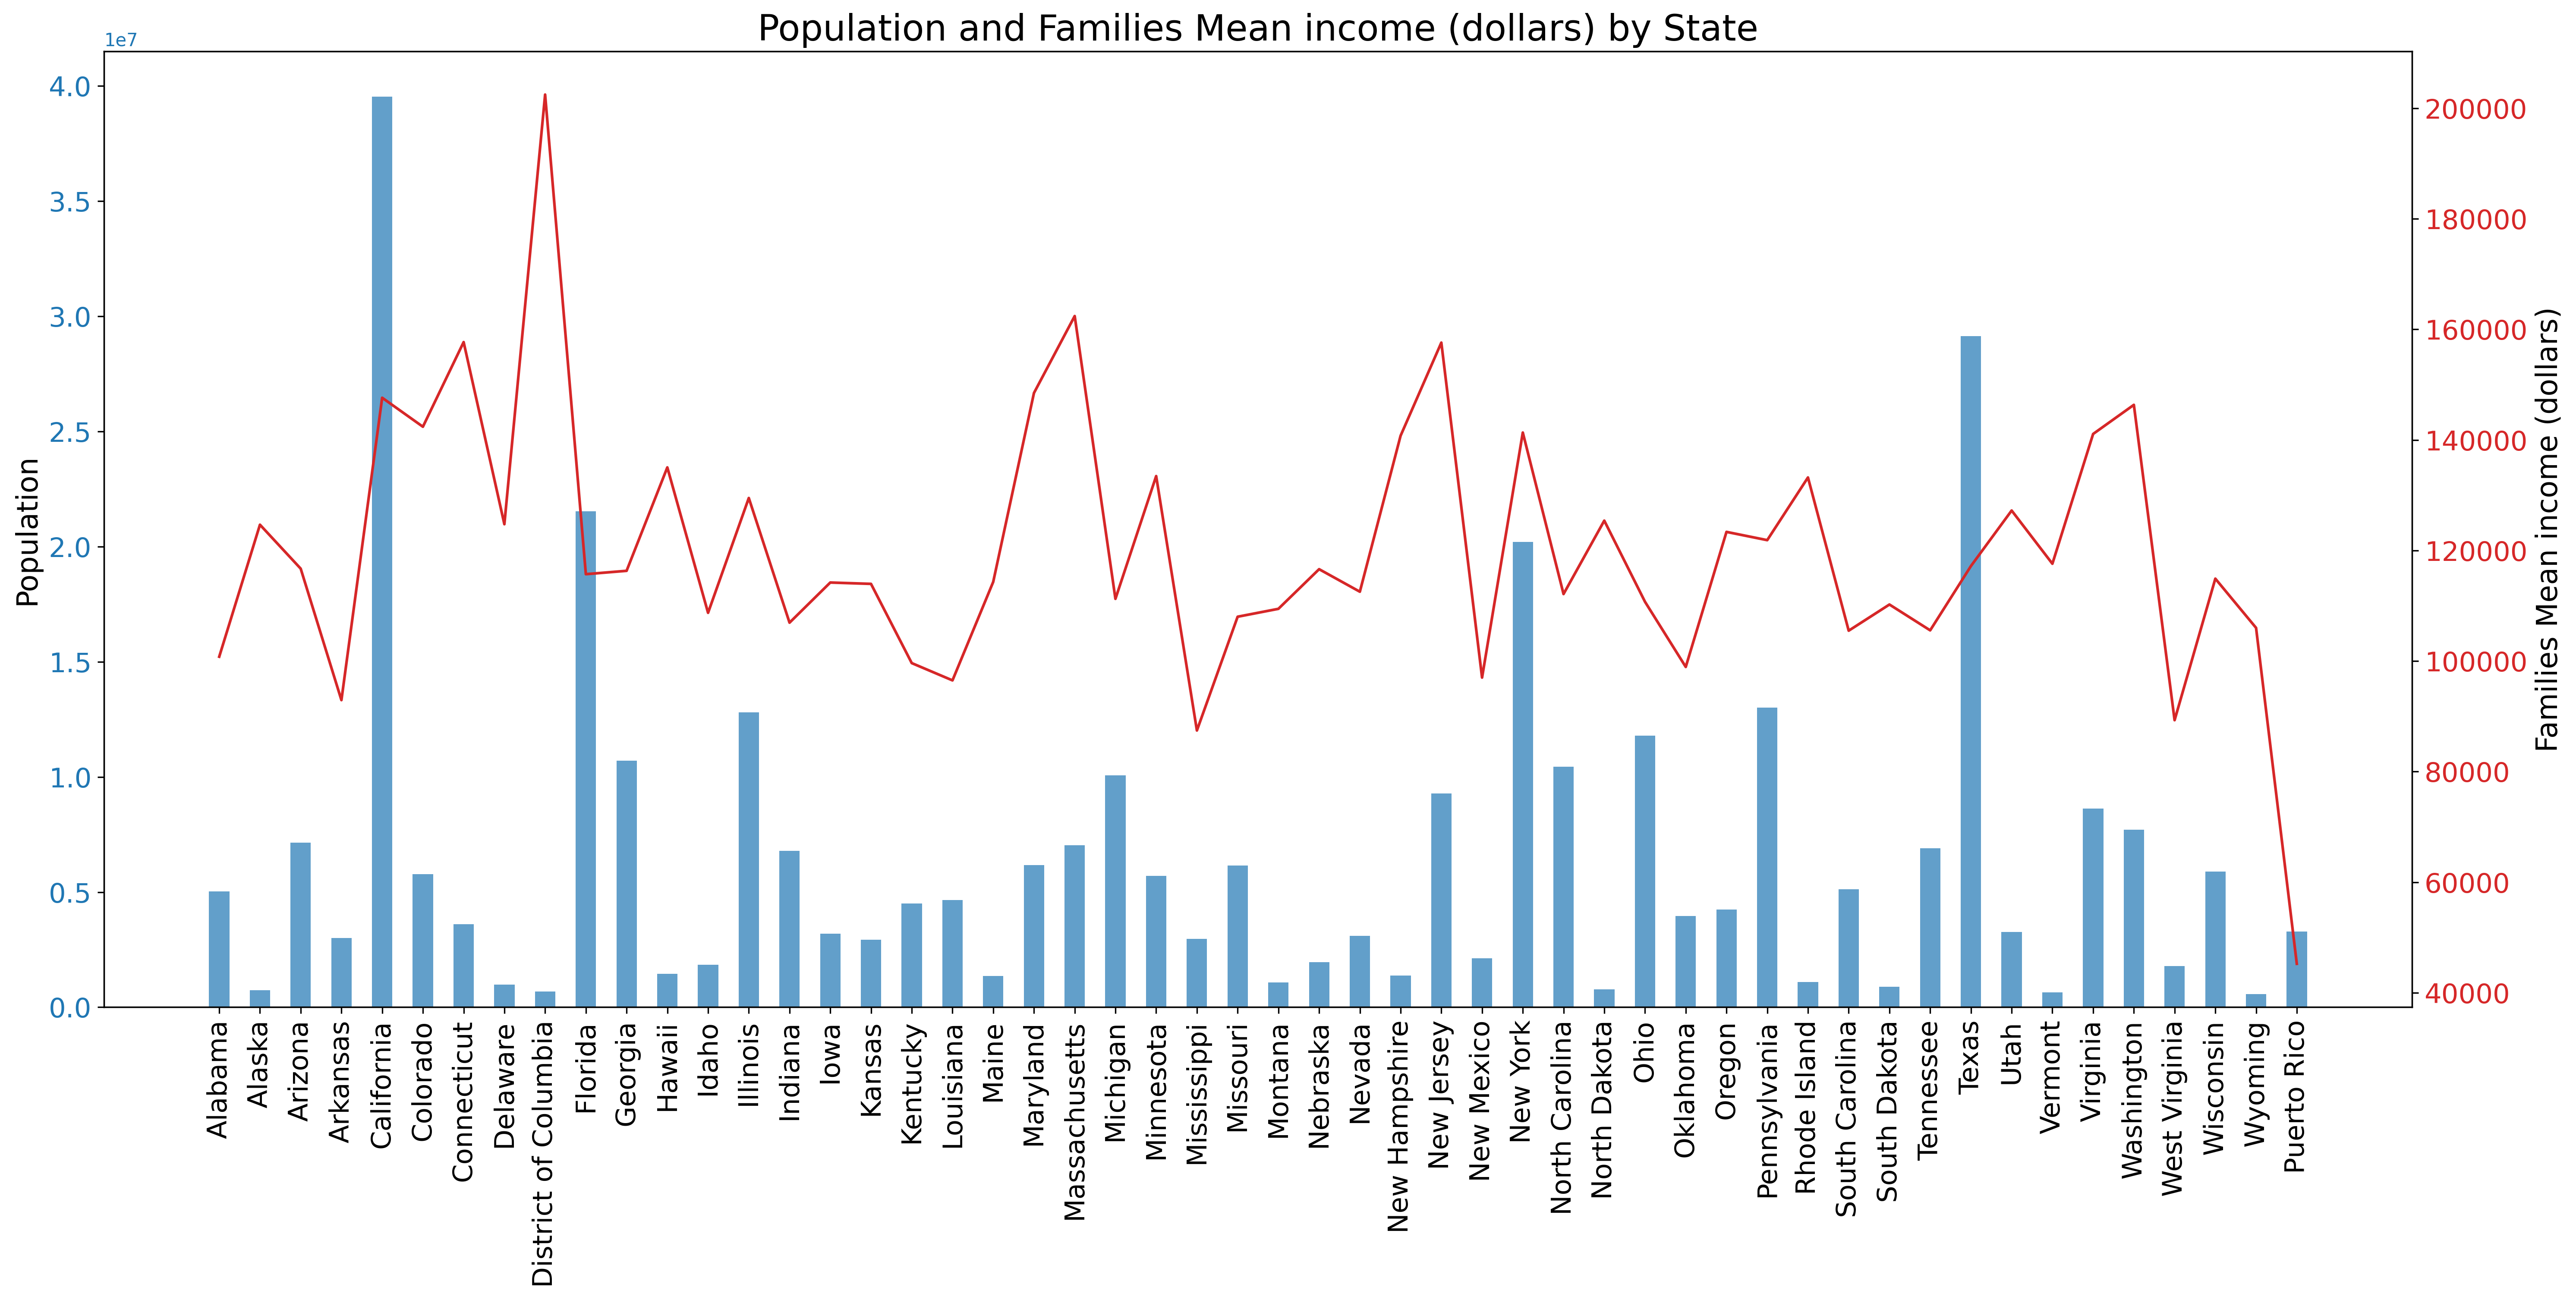

In [10]:
# 选Families Mean income (dollars)和population做可视化，放在一张图里，横坐标是State，纵坐标是Population和Families Mean income (dollars)。Population用蓝色柱状图表示，Families Mean income (dollars)用红色折线图表示。最后保存图片为Demographic.png
#横坐标的字体倾斜90度，避免重叠。图像的分辨率和大小提高。标题字体更大，更清晰。标明横纵坐标的单位。标明蓝色柱状图和红色折线图的含义，用图例表示。标明数据来源。
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots(figsize=(20, 10),dpi=300)

color = 'tab:blue'
ax1.set_ylabel('Population', fontsize=16)
ax1.bar(dem_final['State'], dem_final['Population'], color=color, alpha=0.7, label='Population', width=0.5)
ax1.tick_params(axis='y', labelcolor=color, labelsize=15)
plt.xticks(rotation=90, fontsize=15)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Families Mean income (dollars)', fontsize=16)
ax2.plot(dem_final['State'], dem_final['Families Mean income (dollars)'], color=color)
ax2.tick_params(axis='y', labelcolor=color, labelsize=15)

fig.tight_layout()
plt.title('Population and Families Mean income (dollars) by State', fontsize=20)
plt.savefig('Demographic.png', dpi=300)
plt.show()